# __Coloreado de grafos usando el algoritmo Welsh-Powell__
## Matematicas Avanzadas para Computación
_Jonathan Valencia & David Martinez_

Las librerias implementadas en este programa son networkx y matplotlib, librerias que hemos implementado en la materia de ADA para visualizar grafos de manera grafica.

In [93]:
import networkx as nx
import matplotlib.pyplot as plt

Comenzamos creando un grafo simple no dirijido, en este caso vamos a implementar el mismo grafo visto en clase con los estados de US.
<br>Creamos un grafo vacio y vamos adjuntando los nodos y las aristas que conectan a cada uno

In [94]:
upg = nx.Graph() #Grafo simple no dirijido

# Node names
nodes_name = {1:'Washington', 2:'Idaho', 3:'Montana', 4:'Oregon', 5:'California', 6:'Nevada', 7:'Utah',
              8:'Arizona', 9:'Wyoming', 10:'Colorado', 11:'Nuevo Mexico'}

# Add nodes
upg.add_nodes_from(nodes_name.keys())

# Add connected edges
edges_list = [(1, 4), (1, 2), (2, 3), (2, 9), (2, 7), (3, 9), (4, 2), (4, 5), (4, 6), (5, 6), (5, 8), (6, 8), (6, 2), 
              (6, 7), (7, 8), (7, 10), (7, 9), (8, 11), (9, 10), (10, 11)]
upg.add_edges_from(edges_list)

Iniciamos la implementacion del algoritmo Welsh-Powell, si recordamos de nuestra clase, los pasos a seguir son:
<br>
1. Hallar el grado de cada vertice
2. Ordenar los vetices de manera descendente de acuerdo a su grado
3. Seleccionar la lista de colores a utilizar
4. Moverse por la lista y colorear cada vertise que no esta conectado a un vertice de un mismo color
5. Eliminar los vertices coloreados de la lista
6. Repetir paso 4 hasta tener todos los vertices coloreados

In [95]:
# Function to color graphs using the Welsh-Powell algorithm
def graph_coloring_welsh_powell(g, verbose=False):
    #Paso 3 Welsh
    colors = dict()
    vtx_degree = dict()
    palette = ["blue", "green", "red", "yellow", "pink"] #green-->red red-->green
    
    # Paso 1
    for v in g.nodes():
        vtx_degree[v] = len(list(g.neighbors(v)))
    
    # Paso 2
    vtx_sort = [k for k in sorted(vtx_degree, key=vtx_degree.get, reverse=True)]
    if verbose:
        print(vtx_sort)
    
    # Paso 3
    c_ix = -1
    while len(vtx_sort) > 0 and c_ix < len(palette):
        c_ix += 1
        if verbose:
            print('color:', palette[c_ix], ', No. vertices:', len(vtx_sort))
        
        # Paso 4
        colored_nodes = []
        for v in vtx_sort:
            if len(set(g.neighbors(v)).intersection(set(colored_nodes))) == 0:
                colors[v] = palette[c_ix]
                colored_nodes.append(v)
                
                if verbose:
                    print('  ', v, '->', palette[c_ix], '->', list(g.neighbors(v)))
        
        # Paso 5
        for v in colored_nodes:
            if v in vtx_sort:
                vtx_sort.remove(v)
    
    # Print NC
    if verbose:
        print('Numero cromatico:', (c_ix + 1))
        
        
    return colors

Ejecutamos la funcion, para este caso imprimiremos cada color que se uso en los respectivos nodos y al final imprimimos el numero cromatico

In [96]:
# Get colors by edges
vtx_colors = graph_coloring_welsh_powell(upg, True)

[2, 6, 7, 4, 8, 9, 5, 10, 1, 3, 11]
color: blue , No. vertices: 11
   2 -> blue -> [1, 3, 9, 7, 4, 6]
   8 -> blue -> [5, 6, 7, 11]
   10 -> blue -> [7, 9, 11]
color: green , No. vertices: 8
   6 -> green -> [4, 5, 8, 2, 7]
   9 -> green -> [2, 3, 7, 10]
   1 -> green -> [4, 2]
   11 -> green -> [8, 10]
color: red , No. vertices: 4
   7 -> red -> [2, 6, 8, 10, 9]
   4 -> red -> [1, 2, 5, 6]
   3 -> red -> [2, 9]
color: yellow , No. vertices: 1
   5 -> yellow -> [4, 6, 8]
Numero cromatico: 4


# Implementación grafica

Para efectos de visualizacion vamos acomodar(lo mas posible) los nodos de acuerdo a los ejemplos que vimos en clase. Esto se hace asignando coordenadas a cada nodo:

In [97]:
# Coordinates of each node
upg.nodes[1]['pos']  = (0,4)
upg.nodes[2]['pos']  = (5,3) #Idaho
upg.nodes[3]['pos']  = (6.5, 4)#Montana
upg.nodes[4]['pos']  = (0, 1.5)
upg.nodes[5]['pos']  = (0, -1)
upg.nodes[6]['pos']  = (2, 0)#Nevada
upg.nodes[7]['pos']  = (4, 1) #Utah
upg.nodes[8]['pos']  = (4, -1)#AZ
upg.nodes[9]['pos']  = (8, 3) #Wyoming
upg.nodes[10]['pos'] = (6,1) #Colorado
upg.nodes[11]['pos'] = (6, -1)


# Positions -> dictionary
pos = nx.get_node_attributes(upg, 'pos')

Finalmente, vamos a hacer un plot de nuestro grafo con las etiquetas correspondientes y listo, tenemos nuestro grafo coloreado justo como en clase

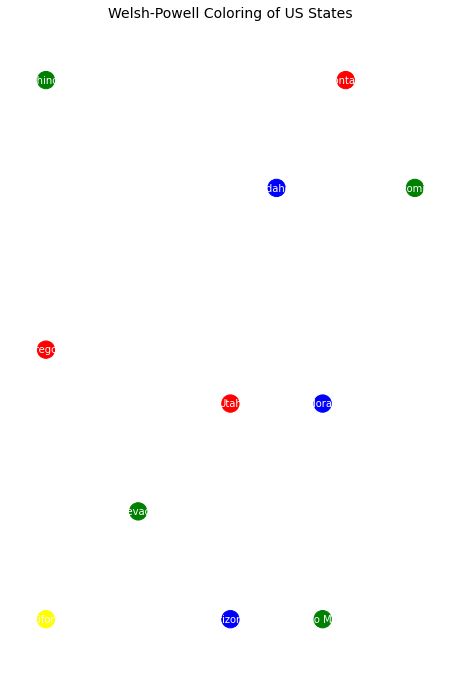

In [99]:
# Nodes labels
node_colors = []
for n in upg.nodes():
    node_colors.append(vtx_colors[n])

# Plot
plt.rcParams["figure.figsize"] = [8, 12]
nx.draw_networkx_nodes(upg, pos, nodelist=upg.nodes(), node_color=node_colors, alpha=1)
nx.draw_networkx_edges(upg, pos, edgelist=upg.edges(), width=1, alpha=0.7, edge_color='white') #dark mode
nx.draw_networkx_labels(upg, pos, nodes_name, font_size=10, font_color='white')
plt.title('Welsh-Powell Coloring of US States', fontsize=14)
plt.axis('off')
plt.show()